# TASK-01

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load data into a Data the DataFrame**

In [2]:
df = pd.read_csv("dataset_1.csv")
df.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,target
0,1,5.1,3.5,1.4,0.2,Class_1
1,2,4.9,3.0,1.4,0.2,Class_1
2,3,4.7,3.2,1.3,0.2,Class_1
3,4,4.6,3.1,1.5,0.2,Class_1
4,5,5.0,3.6,1.4,0.2,Class_1


In [3]:
df.describe()

,Id,Feature_1,Feature_2,Feature_3,Feature_4
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         150 non-null    int64  
 1   Feature_1  150 non-null    float64
 2   Feature_2  150 non-null    float64
 3   Feature_3  150 non-null    float64
 4   Feature_4  150 non-null    float64
 5   target     150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Finding out unique target values** 

In [5]:
df['target'].unique()

array(['Class_1', 'Class_2', 'Class_3'], dtype=object)

**Converting the categorical "target" variable to numeric by Label Encoding Method**

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['target'])
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
df.drop("target", axis=1, inplace=True) 
df["target"] = label
df

,Id,Feature_1,Feature_2,Feature_3,Feature_4,target
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


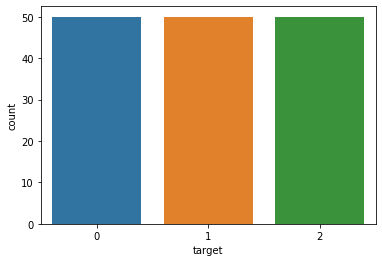

In [8]:
ax = sns.countplot(x="target", data=df)

In [9]:
df['target'].unique()

array([0, 1, 2])

## Performing EDA

**Here I have used sweetviz library for EDA that generates beautiful & high-density visualizations.**

*The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.**

*SweetViz Library is an open-source Python library & has a function named Analyze() which analyzes the whole dataset and provides a detailed report with visualization.**

*Output is a fully self-contained HTML application. The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.**

In [10]:
##(!pip install sweetviz)
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Dropping the 'Feature_4' as it is highly correlated with other features**

In [11]:
df1=df.drop(['Feature_4','Id'], axis = 1)

In [12]:
import sweetviz as sv

my_report = sv.analyze(df1)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
df1.shape

(150, 4)

**Checking for null values**

In [14]:
#no null values
df1.isna().sum()

Feature_1    0
Feature_2    0
Feature_3    0
target       0
dtype: int64

**Creating two dataframes for dependent and independent columns each**

In [15]:
#independent columns
x=df1[['Feature_1','Feature_2','Feature_3']].values

In [16]:
x

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

In [17]:
#dependent column
y=df1[['target']]

In [18]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Splitting training and test data


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
x_train

array([[6.4, 3.1, 5.5],
       [5.4, 3. , 4.5],
       [5.2, 3.5, 1.5],
       [6.1, 3. , 4.9],
       [6.4, 2.8, 5.6],
       [5.2, 2.7, 3.9],
       [5.7, 3.8, 1.7],
       [6. , 2.7, 5.1],
       [5.9, 3. , 4.2],
       [5.8, 2.6, 4. ],
       [6.8, 3. , 5.5],
       [4.7, 3.2, 1.3],
       [6.9, 3.1, 5.1],
       [5. , 3.5, 1.6],
       [5.4, 3.7, 1.5],
       [5. , 2. , 3.5],
       [6.5, 3. , 5.5],
       [6.7, 3.3, 5.7],
       [6. , 2.2, 5. ],
       [6.7, 2.5, 5.8],
       [5.6, 2.5, 3.9],
       [7.7, 3. , 6.1],
       [6.3, 3.3, 4.7],
       [5.5, 2.4, 3.8],
       [6.3, 2.7, 4.9],
       [6.3, 2.8, 5.1],
       [4.9, 2.5, 4.5],
       [6.3, 2.5, 5. ],
       [7. , 3.2, 4.7],
       [6.5, 3. , 5.2],
       [6. , 3.4, 4.5],
       [4.8, 3.1, 1.6],
       [5.8, 2.7, 5.1],
       [5.6, 2.7, 4.2],
       [5.6, 2.9, 3.6],
       [5.5, 2.5, 4. ],
       [6.1, 3. , 4.6],
       [7.2, 3.2, 6. ],
       [5.3, 3.7, 1.5],
       [4.3, 3. , 1.1],
       [6.4, 2.7, 5.3],
       [5.7, 3. 

In [21]:
x_test

array([[5.8, 2.8, 5.1],
       [6. , 2.2, 4. ],
       [5.5, 4.2, 1.4],
       [7.3, 2.9, 6.3],
       [5. , 3.4, 1.5],
       [6.3, 3.3, 6. ],
       [5. , 3.5, 1.3],
       [6.7, 3.1, 4.7],
       [6.8, 2.8, 4.8],
       [6.1, 2.8, 4. ],
       [6.1, 2.6, 5.6],
       [6.4, 3.2, 4.5],
       [6.1, 2.8, 4.7],
       [6.5, 2.8, 4.6],
       [6.1, 2.9, 4.7],
       [4.9, 3.1, 1.5],
       [6. , 2.9, 4.5],
       [5.5, 2.6, 4.4],
       [4.8, 3. , 1.4],
       [5.4, 3.9, 1.3],
       [5.6, 2.8, 4.9],
       [5.6, 3. , 4.5],
       [4.8, 3.4, 1.9],
       [4.4, 2.9, 1.4],
       [6.2, 2.8, 4.8],
       [4.6, 3.6, 1. ],
       [5.1, 3.8, 1.9],
       [6.2, 2.9, 4.3],
       [5. , 2.3, 3.3],
       [5. , 3.4, 1.6]])

In [22]:
y_train

,target
137,2
84,1
27,0
127,2
132,2
...,...
9,0
103,2
67,1
117,2


In [23]:
y_test

,target
114,2
62,1
33,0
107,2
7,0
100,2
40,0
86,1
76,1
71,1


### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [25]:
x_train

array([[ 0.61303014,  0.10850105,  0.94751783],
       [-0.56776627, -0.12400121,  0.38491447],
       [-0.80392556,  1.03851009, -1.30289562],
       [ 0.25879121, -0.12400121,  0.60995581],
       [ 0.61303014, -0.58900572,  1.00377816],
       [-0.80392556, -0.82150798,  0.04735245],
       [-0.21352735,  1.73601687, -1.19037495],
       [ 0.14071157, -0.82150798,  0.72247648],
       [ 0.02263193, -0.12400121,  0.21613346],
       [-0.09544771, -1.05401024,  0.10361279],
       [ 1.0853487 , -0.12400121,  0.94751783],
       [-1.39432376,  0.34100331, -1.41541629],
       [ 1.20342834,  0.10850105,  0.72247648],
       [-1.04008484,  1.03851009, -1.24663528],
       [-0.56776627,  1.50351461, -1.30289562],
       [-1.04008484, -2.4490238 , -0.1776889 ],
       [ 0.73110978, -0.12400121,  0.94751783],
       [ 0.96726906,  0.57350557,  1.0600385 ],
       [ 0.14071157, -1.98401928,  0.66621615],
       [ 0.96726906, -1.2865125 ,  1.11629884],
       [-0.33160699, -1.2865125 ,  0.047

In [26]:
x_test

array([[ 0.14956537, -0.58304897,  0.94512598],
       [ 0.43000045, -1.9460206 ,  0.2829358 ],
       [-0.27108724,  2.59721815, -1.28224097],
       [ 2.25282843, -0.35588703,  1.66751526],
       [-0.97217492,  0.77992265, -1.22204187],
       [ 0.85065306,  0.55276071,  1.48691794],
       [-0.97217492,  1.00708459, -1.34244008],
       [ 1.41152321,  0.09843684,  0.70432955],
       [ 1.55174074, -0.58304897,  0.76452866],
       [ 0.57021798, -0.58304897,  0.2829358 ],
       [ 0.57021798, -1.03737285,  1.24612151],
       [ 0.9908706 ,  0.32559878,  0.58393134],
       [ 0.57021798, -0.58304897,  0.70432955],
       [ 1.13108813, -0.58304897,  0.64413044],
       [ 0.57021798, -0.35588703,  0.70432955],
       [-1.11239246,  0.09843684, -1.22204187],
       [ 0.43000045, -0.35588703,  0.58393134],
       [-0.27108724, -1.03737285,  0.52373223],
       [-1.25261   , -0.1287251 , -1.28224097],
       [-0.41130478,  1.91573234, -1.34244008],
       [-0.1308697 , -0.58304897,  0.824

## Applying Different Algorithms

### Logistic Regression

In [27]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LogisticRegression()
reg.fit(x_train, y_train)
y_pred1 = reg.predict(x_test)

C:\Users\Anil\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


**Accuracy for Logistic Regression**

In [28]:
print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred1)*100)

Logistic Regression model accuracy(in %): 73.33333333333333


**Confusion Matrix - Logistic Regression**

In [29]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred1)
print("Logistic Regression Confusion Matrix:\n", cm)

Logistic Regression Confusion Matrix:
 [[11  0  0]
 [ 0  5  8]
 [ 0  0  6]]


### Decision Tree Algorithm

In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


def train_using_gini(x_train, x_test, y_train):
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
 
    clf_gini.fit(x_train, y_train)
    return clf_gini
      
def tarin_using_entropy(x_train, x_test, y_train):
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    clf_entropy.fit(x_train, y_train)
    return clf_entropy
  

def prediction(x_test, clf_object):
    y_pred2 = clf_object.predict(x_test)
    print("Predicted values:")
    print(y_pred2)
    return y_pred2
      

def cal_accuracy(y_test, y_pred2):    
    print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred2))
      
    print ("Accuracy :",accuracy_score(y_test,y_pred2)*100)
      
    print("Report :\n",classification_report(y_test, y_pred2))

def main():
    
    clf_gini = train_using_gini(x_train, x_test, y_train)
    clf_entropy = tarin_using_entropy(x_train, x_test, y_train)
    print("Results Using Gini Index:\n")
    print("*************************************")
      
    # Prediction using gini
    y_pred_gini = prediction(x_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:\n")
    print("*************************************")

    # Prediction using entropy
    y_pred_entropy = prediction(x_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
if __name__=="__main__":
    main()

Results Using Gini Index:

*************************************
Predicted values:
[2 1 0 2 0 2 0 2 2 1 2 2 2 2 2 0 2 1 0 0 2 2 0 0 2 0 0 1 1 0]
Confusion Matrix:
 [[11  0  0]
 [ 0  5  8]
 [ 0  0  6]]
Accuracy : 73.33333333333333
Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.38      0.56        13
           2       0.43      1.00      0.60         6

    accuracy                           0.73        30
   macro avg       0.81      0.79      0.72        30
weighted avg       0.89      0.73      0.73        30

Results Using Entropy:

*************************************
Predicted values:
[2 1 0 2 0 2 0 2 2 1 2 2 2 2 2 0 2 1 0 0 2 2 0 0 2 0 0 1 1 0]
Confusion Matrix:
 [[11  0  0]
 [ 0  5  8]
 [ 0  0  6]]
Accuracy : 73.33333333333333
Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.38

### Naive Bayes 

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred3 = gnb.predict(x_test)

C:\Users\Anil\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


**Accuracy for Naive Bayes**

In [32]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred3)*100)

Gaussian Naive Bayes model accuracy(in %): 80.0


### Support Vector Machine

In [33]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, confusion_matrix
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

C:\Users\Anil\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear', random_state=0)

In [34]:
y_pred4= classifier.predict(x_test)  
y_pred4

array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0])

**Accuracy for SVM**

In [35]:
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.975
0.7333333333333333


### XGBoost Algorithm

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = XGBClassifier()
classifier.fit(x_train, y_train)
y_pred5 = classifier.predict(x_test)

C:\Users\Anil\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


**Accuracy of XGBoost**

In [37]:
print("Accuracy of XG-Boost:\n",accuracy_score(y_test, y_pred5)*100)

Accuracy of XG-Boost:
 80.0


**Confusion Matrix - XGBoost**

In [38]:
cm_xg = confusion_matrix(y_test, y_pred5)
print("Confusion Matrix - XGBoost:\n",cm_xg)

Confusion Matrix - XGBoost:
 [[11  0  0]
 [ 0  7  6]
 [ 0  0  6]]


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()
X_train, X_test, y_train, y_test= train_test_split(x,y ,test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)



from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),LogisticRegression(random_state=0),DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=15),GaussianNB(),KNeighborsClassifier(n_neighbors=4)]


CV = 3  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))

# Initially all entries are empty
entries = [] 

#For each Algorithm 
for model in models:
    model_name = model.__class__.__name__
    # create 5 models with different 20% test sets, and store their accuracies
    accuracies = cross_val_score(model,x,y, scoring='accuracy', cv=CV)
    # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        
        
# Store the entries into the results dataframe and name its columns    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\Anil\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Anil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

In [41]:
print(cv_df)

                model_name  fold_idx  accuracy
0   RandomForestClassifier         0      0.94
1   RandomForestClassifier         1      0.92
2   RandomForestClassifier         2      0.96
3       LogisticRegression         0      0.96
4       LogisticRegression         1      0.94
5       LogisticRegression         2      0.94
6   DecisionTreeClassifier         0      0.96
7   DecisionTreeClassifier         1      0.92
8   DecisionTreeClassifier         2      0.96
9               GaussianNB         0      0.86
10              GaussianNB         1      0.90
11              GaussianNB         2      0.94
12    KNeighborsClassifier         0      0.98
13    KNeighborsClassifier         1      0.90
14    KNeighborsClassifier         2      0.94
